In [1]:
import numpy as np
import pandas as pd


#used for test train split
from sklearn.model_selection import train_test_split

#importing model libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

#for accuracy tests
from sklearn.metrics import accuracy_score

#confusion matrix
from sklearn.metrics import confusion_matrix

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#grid search library
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv('/Users/megandoiron/Desktop/Data Science Foundations/repos/DS_Foundations_Final_Project/SpotifyData.csv')

In [4]:
#find out how many datapoints for each genre
grouped = df.groupby('track_genre')['track_genre'].count()
grouped

#see all different genres
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [5]:
def read_csv_clean_data(path_to_file):
    #insert path to file
    path = path_to_file
    df = pd.read_csv(f'{path}/SpotifyData.csv', index_col = 0)
    
    #drop unneeded/wanted columns
    df = df.drop(columns = ['track_id', 'artists', 'album_name', 'track_name', 'explicit'])
    df = df.dropna()
    
    #shuffle dataset
    df = df.sample(frac = 1)
    
    #select a few genres to work with
    df = df[df['track_genre'].isin(['heavy-metal' ,'country', 'pop', 'hip-hop', 'classical'])]
    return df

In [7]:
df = read_csv_clean_data('/Users/megandoiron/Desktop/Data Science Foundations/repos/DS_Foundations_Final_Project')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 81853 to 19555
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        5000 non-null   int64  
 1   duration_ms       5000 non-null   int64  
 2   danceability      5000 non-null   float64
 3   energy            5000 non-null   float64
 4   key               5000 non-null   int64  
 5   loudness          5000 non-null   float64
 6   mode              5000 non-null   int64  
 7   speechiness       5000 non-null   float64
 8   acousticness      5000 non-null   float64
 9   instrumentalness  5000 non-null   float64
 10  liveness          5000 non-null   float64
 11  valence           5000 non-null   float64
 12  tempo             5000 non-null   float64
 13  time_signature    5000 non-null   int64  
 14  track_genre       5000 non-null   object 
dtypes: float64(9), int64(5), object(1)
memory usage: 625.0+ KB


In [8]:
#confusion matrix with scikit learn.
#model with highest validation (test) score will be best model


In [9]:
def modeling(model, df):
    X = df.drop(columns = 'track_genre')
    y = df['track_genre']
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = .25, random_state = 0)

    model_1 = model

    model_1.fit(Xtrain, ytrain)

    y_predict = model_1.predict(Xtest)

    y_predict_train = model_1.predict(Xtrain)
    
    print(f'Model Test Accuracy Score: {accuracy_score(ytest, y_predict)}')
    
    print(f'Model Train Accuracy Score: {accuracy_score(ytrain, y_predict_train)}')
    
    mat = confusion_matrix(ytest, y_predict)

    plt.figure(figsize = (16,5))
    sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='YlGnBu') #flag, YlGnBu, jet
    plt.xlabel('predicted value')
    plt.ylabel('true value');
    return y_predict, Xtrain, Xtest, ytrain, ytest

Model Test Accuracy Score: 0.8752
Model Train Accuracy Score: 0.9845333333333334


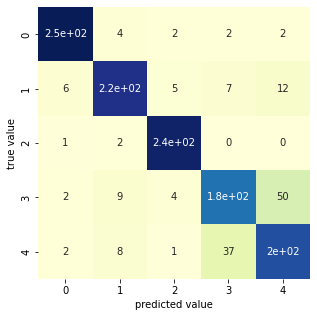

In [10]:
y_predict_randomforest, Xtrain, Xtest, ytrain, ytest= modeling(RandomForestClassifier(), df)

Model Test Accuracy Score: 0.3752
Model Train Accuracy Score: 0.36133333333333334


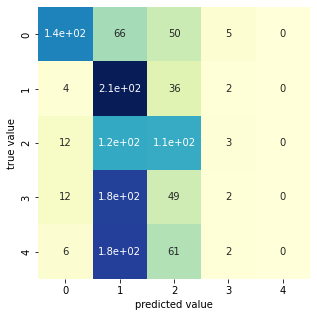

In [11]:
y_predict_svc, Xtrain, Xtest, ytrain, ytest = modeling(svm.SVC(), df)

Model Test Accuracy Score: 0.8672
Model Train Accuracy Score: 0.9448


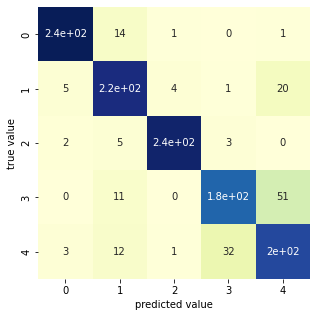

In [12]:
y_predict_gradientboosting, Xtrain, Xtest, ytrain, ytest = modeling(GradientBoostingClassifier(), df)

In [13]:
def grid_search(model, params, Xtrain, ytrain, Xtest, ytest):
    
    params_grid= params
    
    grid = GridSearchCV(model, params_grid, cv = 5)
    
    grid.fit(Xtrain, ytrain)
    print(f'Best params: {grid.best_params_}')
    
    y_predict = grid.predict(Xtest)
    print(f'Test Accuracy Score: {accuracy_score(y_predict, ytest)}')
    return y_predict

In [14]:
y_predict_rf = grid_search(RandomForestClassifier(),{
    'n_estimators'     : [100, 300, 500],
    'max_depth'        : [5, 15, 30],
    'min_samples_split': [5, 15, 100],
    'random_state'     : [0]}, 
                Xtrain, ytrain, Xtest, ytest )

Best params: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 300, 'random_state': 0}
Test Accuracy Score: 0.876


In [58]:
y_predict_gb = grid_search(GradientBoostingClassifier(), 
                        {'learning_rate': [1, 0.5, .01], 
                         'n_estimators': [50, 100, 200],
                         'random_state' : [0],
                         'min_samples_split': [2, 5, 10]}, Xtrain, ytrain, Xtest, ytest)

Best params: {'learning_rate': 0.5, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 0}
Test Accuracy Score: 0.8672


In [62]:
def random_search(model, params, Xtrain, ytrain, Xtest, ytest):
    params_list = params
    
    random = RandomizedSearchCV(model, params_list, cv = 5)
    
    random.fit(Xtrain, ytrain)
    print(f'Best params: {random.best_params_}')
    
    y_predict = random.predict(Xtest)
    print(f'Test Accuracy Score: {accuracy_score(y_predict, ytest)}')
    return y_predict

In [65]:
y_predict_rs_rf = random_search(RandomForestClassifier(), {'bootstrap': [True, False], 
              'max_depth': [10, 50, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 500, 1000],
              'random_state': [0]
             }, Xtrain, ytrain, Xtest, ytest)

Best params: {'random_state': 0, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Test Accuracy Score: 0.8768


In [67]:
y_predict_rs_gb = random_search(GradientBoostingClassifier(), {'learning_rate': [1, 0.5, .1, .01], 
              'n_estimators': [50, 100, 200],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 500, 1000],
              'random_state': [0]
             }, Xtrain, ytrain, Xtest, ytest)

Best params: {'random_state': 0, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'learning_rate': 0.5}
Test Accuracy Score: 0.8648
